

## Introduction
FicZon Inc., an IT solutions provider, was facing a decline in sales due to increasing market competition. The company's business is heavily dependent on the effectiveness of its sales force, which primarily engages leads generated through its website. A major challenge was the inefficient and manual process of categorizing lead quality, which relied on the subjective judgment of sales staff. This project was initiated to explore a machine learning solution to automate this process. The primary goal was to develop a model that could pre-categorize leads as either 

# Data from SQL db 

In [1]:
from sqlalchemy import create_engine, inspect
import urllib.parse
import warnings
warnings.filterwarnings('ignore')


# Database details
db_host = '18.136.157.135'
db_name = 'project_sales'
username = 'dm_team2'
password = 'DM!$Team&27@9!20!'  

# Encode username and password for URL
username_enc = urllib.parse.quote_plus(username)
password_enc = urllib.parse.quote_plus(password)

# Create connection
conn_str = f"mysql+pymysql://{username_enc}:{password_enc}@{db_host}:3306/{db_name}"
engine = create_engine(conn_str)

# Create inspector
inspector = inspect(engine)

# Get table names
table_names = inspector.get_table_names()
print("Tables in database:", table_names)

Tables in database: ['data']


In [2]:
import pandas as pd

query = "SELECT * FROM data"
data = pd.read_sql(query, engine)  # use engine, not conn

data.head()

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
0,14-11-2018 10:05,,Website,984XXXXXXX,aXXXXXXX@gmail.com,Sales-Agent-11,,Mode-5,Open
1,14-11-2018 09:22,,Website,XXXXXXX,#VALUE!,Sales-Agent-10,,Mode-5,Open
2,14-11-2018 09:21,,Website,XXXXXXX,dXXXXXXX@yahoo.com,Sales-Agent-10,,Mode-5,Open
3,14-11-2018 08:46,,Website,XXXXXXX,wXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open
4,14-11-2018 07:34,,Website,XXXXXXX,cXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open


In [3]:
data.shape

(7422, 9)

In [4]:
data.isnull().sum()                    #to check any NaN values

Created          0
Product_ID       0
Source           0
Mobile           0
EMAIL            0
Sales_Agent      0
Location         0
Delivery_Mode    0
Status           0
dtype: int64

In [5]:
data['Status'].value_counts()             # target,output categories counts

Status
Junk Lead               1536
Not Responding          1129
CONVERTED                834
Just Enquiry             760
Potential                708
Long Term                646
In Progress Positive     643
In Progress Negative     626
LOST                     440
Open                      82
converted                 18
Name: count, dtype: int64

In [6]:
#features counts seperately

In [7]:
data['Source'].value_counts()

Source
Call                             2547
Live Chat-Direct                 1834
Website                          1594
Live Chat-Google Organic          274
Live Chat -PPC                    249
Live Chat-Blog                    237
Customer Referral                 180
US Website                        137
Just Dial                          56
Existing Client                    51
Personal Contact                   50
Live Chat-CPC                      50
By Recommendation                  32
CRM form                           23
Existing Customer                  22
Live Chat-Google Ads               21
Campaign                           19
                                   17
E-mail Campaign                    12
Live Chat-Adwords Remarketing       7
Other                               2
Live Chat-Quora                     2
Live Chat-Youtube                   2
SMS Campaign                        2
E-Mail Message                      1
Live Chat-Justdial                  1
Name:

In [8]:
data['Sales_Agent'].value_counts()

Sales_Agent
Sales-Agent-4     1500
Sales-Agent-11    1420
Sales-Agent-5     1190
Sales-Agent-9      879
Sales-Agent-3      781
Sales-Agent-7      736
Sales-Agent-2      389
Sales-Agent-12     269
Sales-Agent-6      114
Sales-Agent-8       68
Sales-Agent-10      49
                    23
Sales-Agent-1        4
Name: count, dtype: int64

In [9]:
data['Location'].value_counts()

Location
Other Locations    2500
Bangalore          2084
Chennai             909
Hyderabad           528
Delhi               471
Mumbai              402
Pune                142
UAE                  79
                     58
Trivandrum           58
Kolkata              55
USA                  45
UK                   41
AUSTRALIA            25
Singapore            17
Malaysia              4
EUROPE                3
Howrah                1
Name: count, dtype: int64

In [10]:
data['Delivery_Mode'].value_counts()

Delivery_Mode
Mode-5    2975
Mode-1    2627
Mode-3    1688
Mode-4     121
Mode-2      11
Name: count, dtype: int64

# EDA

In [11]:
data.head()

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
0,14-11-2018 10:05,,Website,984XXXXXXX,aXXXXXXX@gmail.com,Sales-Agent-11,,Mode-5,Open
1,14-11-2018 09:22,,Website,XXXXXXX,#VALUE!,Sales-Agent-10,,Mode-5,Open
2,14-11-2018 09:21,,Website,XXXXXXX,dXXXXXXX@yahoo.com,Sales-Agent-10,,Mode-5,Open
3,14-11-2018 08:46,,Website,XXXXXXX,wXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open
4,14-11-2018 07:34,,Website,XXXXXXX,cXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open


In [12]:
# first,avoid unwanted features which are not related to output

In [13]:
data.drop(['Mobile','EMAIL'],axis=1,inplace=True)

In [14]:
# work from first column,

In [15]:
# date,time needs to set in the right form to do further analysis

In [16]:
data['Created']=pd.to_datetime(data.Created)

In [17]:
data.head(2)

,Created,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
0,2018-11-14 10:05:00,,Website,Sales-Agent-11,,Mode-5,Open
1,2018-11-14 09:22:00,,Website,Sales-Agent-10,,Mode-5,Open


In [18]:
#to create new columns from date-time  for day,month,year,hour,minute,weekday etc....to get more accurate results

In [19]:
data['Day']=data.Created.dt.day
data['Month']=data.Created.dt.month
data['Weekday']=data.Created.dt.weekday
#data['Year']=data.Created.dt.year          everyone same year
data['Hour']=data.Created.dt.hour
data['Minute']=data.Created.dt.minute

In [20]:
data.head()

,Created,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status,Day,Month,Weekday,Hour,Minute
0,2018-11-14 10:05:00,,Website,Sales-Agent-11,,Mode-5,Open,14,11,2,10,5
1,2018-11-14 09:22:00,,Website,Sales-Agent-10,,Mode-5,Open,14,11,2,9,22
2,2018-11-14 09:21:00,,Website,Sales-Agent-10,,Mode-5,Open,14,11,2,9,21
3,2018-11-14 08:46:00,,Website,Sales-Agent-10,,Mode-5,Open,14,11,2,8,46
4,2018-11-14 07:34:00,,Website,Sales-Agent-10,,Mode-5,Open,14,11,2,7,34


In [21]:
data.drop(['Created'],axis=1,inplace=True)          #use & throw

In [22]:
data.head()

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status,Day,Month,Weekday,Hour,Minute
0,,Website,Sales-Agent-11,,Mode-5,Open,14,11,2,10,5
1,,Website,Sales-Agent-10,,Mode-5,Open,14,11,2,9,22
2,,Website,Sales-Agent-10,,Mode-5,Open,14,11,2,9,21
3,,Website,Sales-Agent-10,,Mode-5,Open,14,11,2,8,46
4,,Website,Sales-Agent-10,,Mode-5,Open,14,11,2,7,34


In [23]:
from collections import Counter            #import all packages to be needed
import numpy as np
import scipy
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
sb.set()

In [24]:
#we have some empty fields , no more, around 1-2%, just delete those rows

In [25]:
data.drop(data[data['Product_ID']==''].index,inplace=True)
data.drop(data[data['Location']==''].index,inplace=True)
data.drop(data[data['Source']==''].index,inplace=True)
data.drop(data[data['Delivery_Mode']==''].index,inplace=True)
data.drop(data[data['Sales_Agent']==''].index,inplace=True)
data.drop(data[data['Day']==''].index,inplace=True)
data.drop(data[data['Month']==''].index,inplace=True)
data.drop(data[data['Weekday']==''].index,inplace=True)
data.drop(data[data['Hour']==''].index,inplace=True)
data.drop(data[data['Minute']==''].index,inplace=True)
data.drop(data[data['Status']==''].index,inplace=True)

In [26]:
data

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status,Day,Month,Weekday,Hour,Minute
18,9,Live Chat-Google Organic,Sales-Agent-3,Bangalore,Mode-1,Potential,13,11,1,18,51
19,19,Call,Sales-Agent-4,Other Locations,Mode-5,Potential,13,11,1,18,48
24,18,Website,Sales-Agent-11,Trivandrum,Mode-1,Potential,13,11,1,17,9
25,15,Website,Sales-Agent-7,Hyderabad,Mode-1,Not Responding,13,11,1,16,49
26,18,Call,Sales-Agent-7,Bangalore,Mode-1,In Progress Positive,13,11,1,16,37
...,...,...,...,...,...,...,...,...,...,...,...
7417,9,Call,Sales-Agent-6,Mumbai,Mode-4,LOST,28,4,5,9,45
7418,15,Call,Sales-Agent-12,Other Locations,Mode-5,LOST,28,4,5,9,43
7419,5,Live Chat-Direct,Sales-Agent-11,Bangalore,Mode-1,Not Responding,28,4,5,9,20
7420,21,CRM form,Sales-Agent-4,Other Locations,Mode-1,Just Enquiry,28,4,5,8,4


In [27]:
# rearrage the column for standard

In [28]:
data=data.reindex(columns=['Product_ID','Location','Source','Delivery_Mode','Sales_Agent','Day','Month','Weekday','Hour','Minute','Status'])

In [29]:
data

,Product_ID,Location,Source,Delivery_Mode,Sales_Agent,Day,Month,Weekday,Hour,Minute,Status
18,9,Bangalore,Live Chat-Google Organic,Mode-1,Sales-Agent-3,13,11,1,18,51,Potential
19,19,Other Locations,Call,Mode-5,Sales-Agent-4,13,11,1,18,48,Potential
24,18,Trivandrum,Website,Mode-1,Sales-Agent-11,13,11,1,17,9,Potential
25,15,Hyderabad,Website,Mode-1,Sales-Agent-7,13,11,1,16,49,Not Responding
26,18,Bangalore,Call,Mode-1,Sales-Agent-7,13,11,1,16,37,In Progress Positive
...,...,...,...,...,...,...,...,...,...,...,...
7417,9,Mumbai,Call,Mode-4,Sales-Agent-6,28,4,5,9,45,LOST
7418,15,Other Locations,Call,Mode-5,Sales-Agent-12,28,4,5,9,43,LOST
7419,5,Bangalore,Live Chat-Direct,Mode-1,Sales-Agent-11,28,4,5,9,20,Not Responding
7420,21,Other Locations,CRM form,Mode-1,Sales-Agent-4,28,4,5,8,4,Just Enquiry


In [30]:
# Lets start to play through columns by columns to visualize and modeling...........EDA

In [31]:
data['Product_ID'].value_counts()

Product_ID
18    1706
15    1501
19    1188
9      990
27     737
5      484
10     168
1      104
20     101
25      90
21      65
2       38
12      36
26      31
14      27
11      12
22       8
3        7
6        7
17       6
8        6
13       4
16       3
23       2
24       2
0        2
28       1
7        1
4        1
Name: count, dtype: int64

In [32]:
data['Product_ID']=data['Product_ID'].astype('int64')           #to sure as an int types to show in plots

In [33]:
from sklearn.preprocessing import LabelEncoder               #Label Encoding
enc=LabelEncoder()
data.Source=enc.fit_transform(data.Source)
data.Sales_Agent=enc.fit_transform(data.Sales_Agent)
data.Location=enc.fit_transform(data.Location)
data.Delivery_Mode=enc.fit_transform(data.Delivery_Mode)

In [34]:
data.Status.value_counts()

Status
Junk Lead               1532
Not Responding          1119
CONVERTED                834
Just Enquiry             751
Potential                705
Long Term                644
In Progress Positive     642
In Progress Negative     625
LOST                     439
Open                      19
converted                 18
Name: count, dtype: int64

In [35]:
#lets convert into binary classification probs

In [36]:
# 0 -----> Low Potential   & 1-------> High Potential

In [37]:
data.Status[data['Status']=='Junk Lead']=0
data.Status[data['Status']=='Not Responding']=0
data.Status[data['Status']=='CONVERTED']=1
data.Status[data['Status']=='Just Enquiry']=1
data.Status[data['Status']=='Potential']=1
data.Status[data['Status']=='Long Term']=1
data.Status[data['Status']=='In Progress Positive']=1
data.Status[data['Status']=='In Progress Negative']=0
data.Status[data['Status']=='LOST']=0
data.Status[data['Status']=='Open']=1
data.Status[data['Status']=='converted']=1

In [38]:
data.Status=data['Status'].astype('int64')

In [39]:
data

,Product_ID,Location,Source,Delivery_Mode,Sales_Agent,Day,Month,Weekday,Hour,Minute,Status
18,9,1,16,0,4,13,11,1,18,51,1
19,19,10,2,4,5,13,11,1,18,48,1
24,18,13,24,0,1,13,11,1,17,9,1
25,15,6,24,0,8,13,11,1,16,49,0
26,18,1,2,0,8,13,11,1,16,37,1
...,...,...,...,...,...,...,...,...,...,...,...
7417,9,9,2,3,7,28,4,5,9,45,0
7418,15,10,2,4,2,28,4,5,9,43,0
7419,5,1,14,0,1,28,4,5,9,20,0
7420,21,10,1,0,5,28,4,5,8,4,1


In [40]:
data.Status.value_counts()

Status
0    3715
1    3613
Name: count, dtype: int64

In [41]:
# successfully digitalized every data in datasets...beauty

# Plotting

In [42]:
# 1) Box Plot

<Axes: >

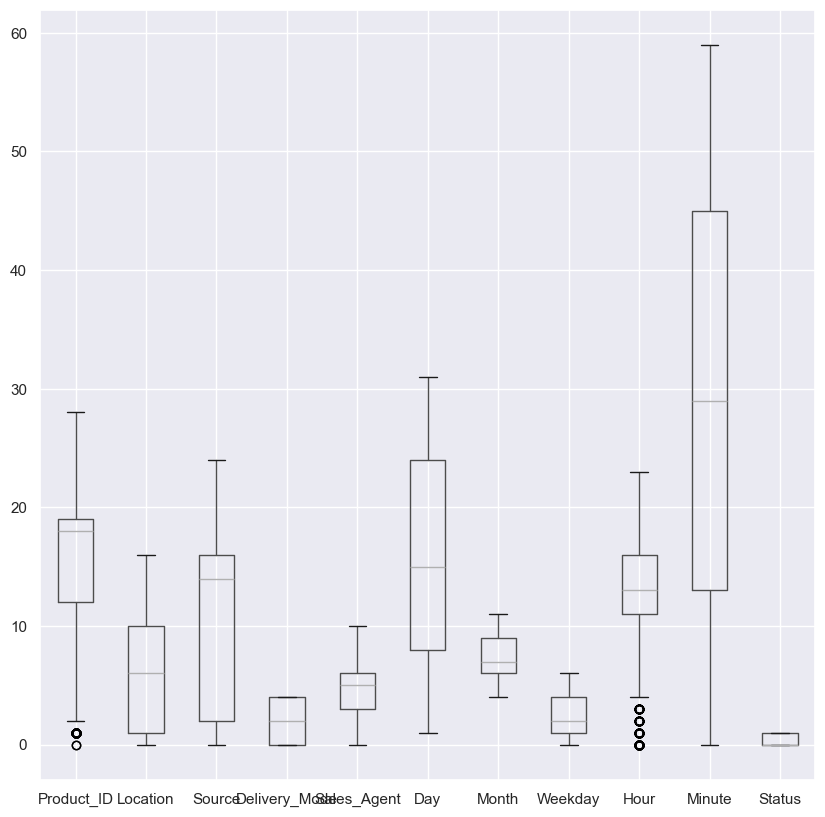

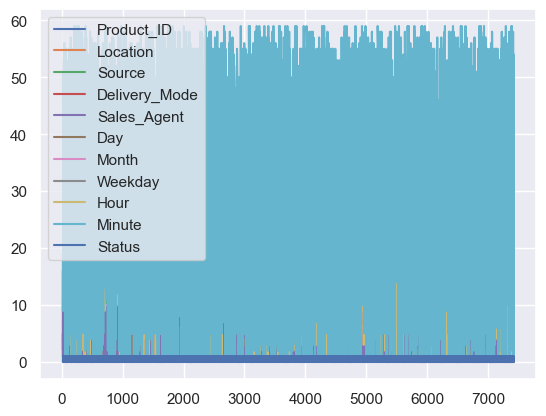

In [43]:
data.boxplot(figsize=(10,10))
data.plot()

In [44]:
# 2)  Histogram plot

<Axes: >

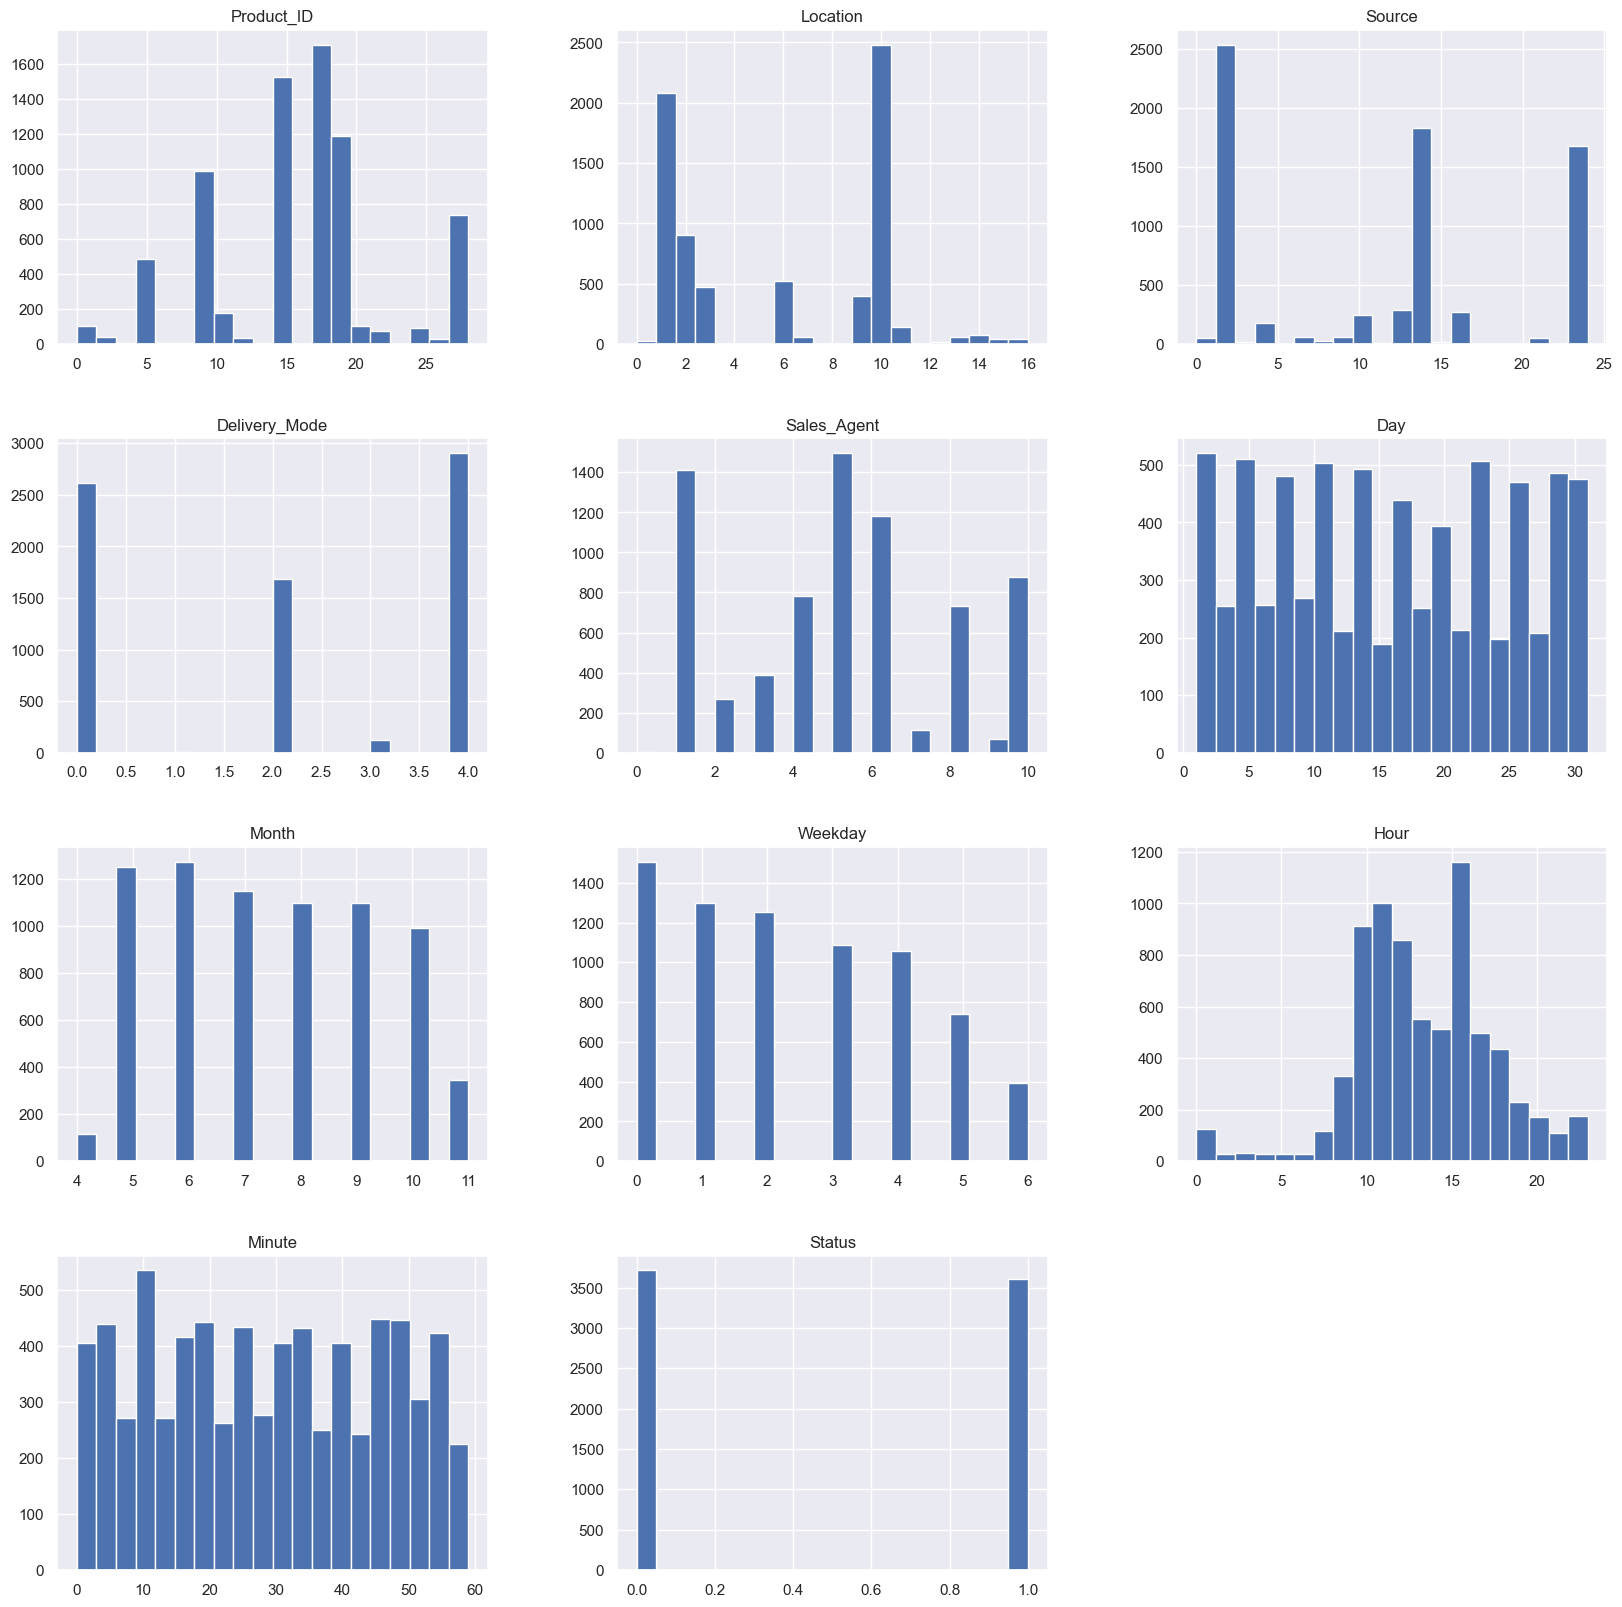

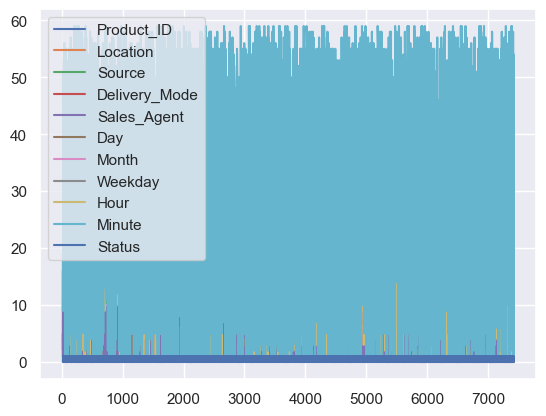

In [45]:
data.hist(bins=20,figsize=(20,20))
data.plot()

In [46]:
# 3) barplot

<Axes: >

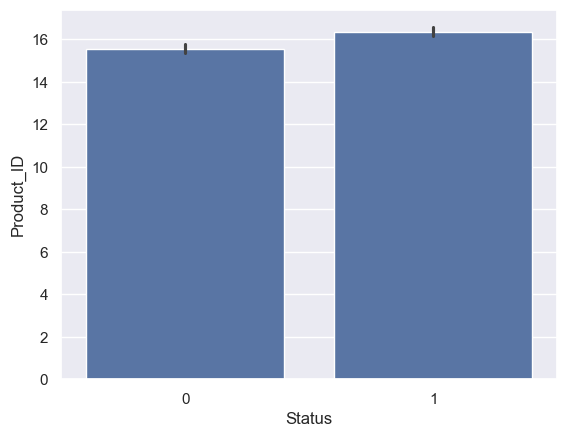

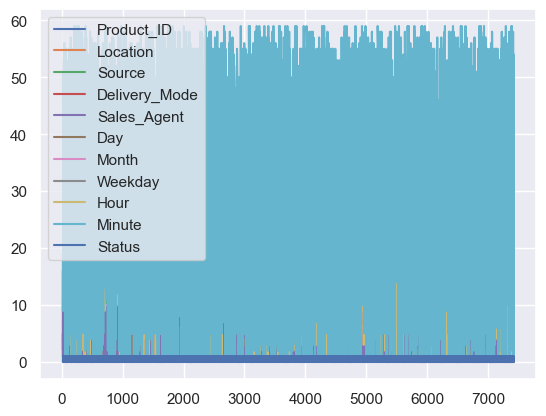

In [47]:
sb.barplot(x=data['Status'],y=data['Product_ID'])
data.plot()

In [48]:
# subplots-barplot

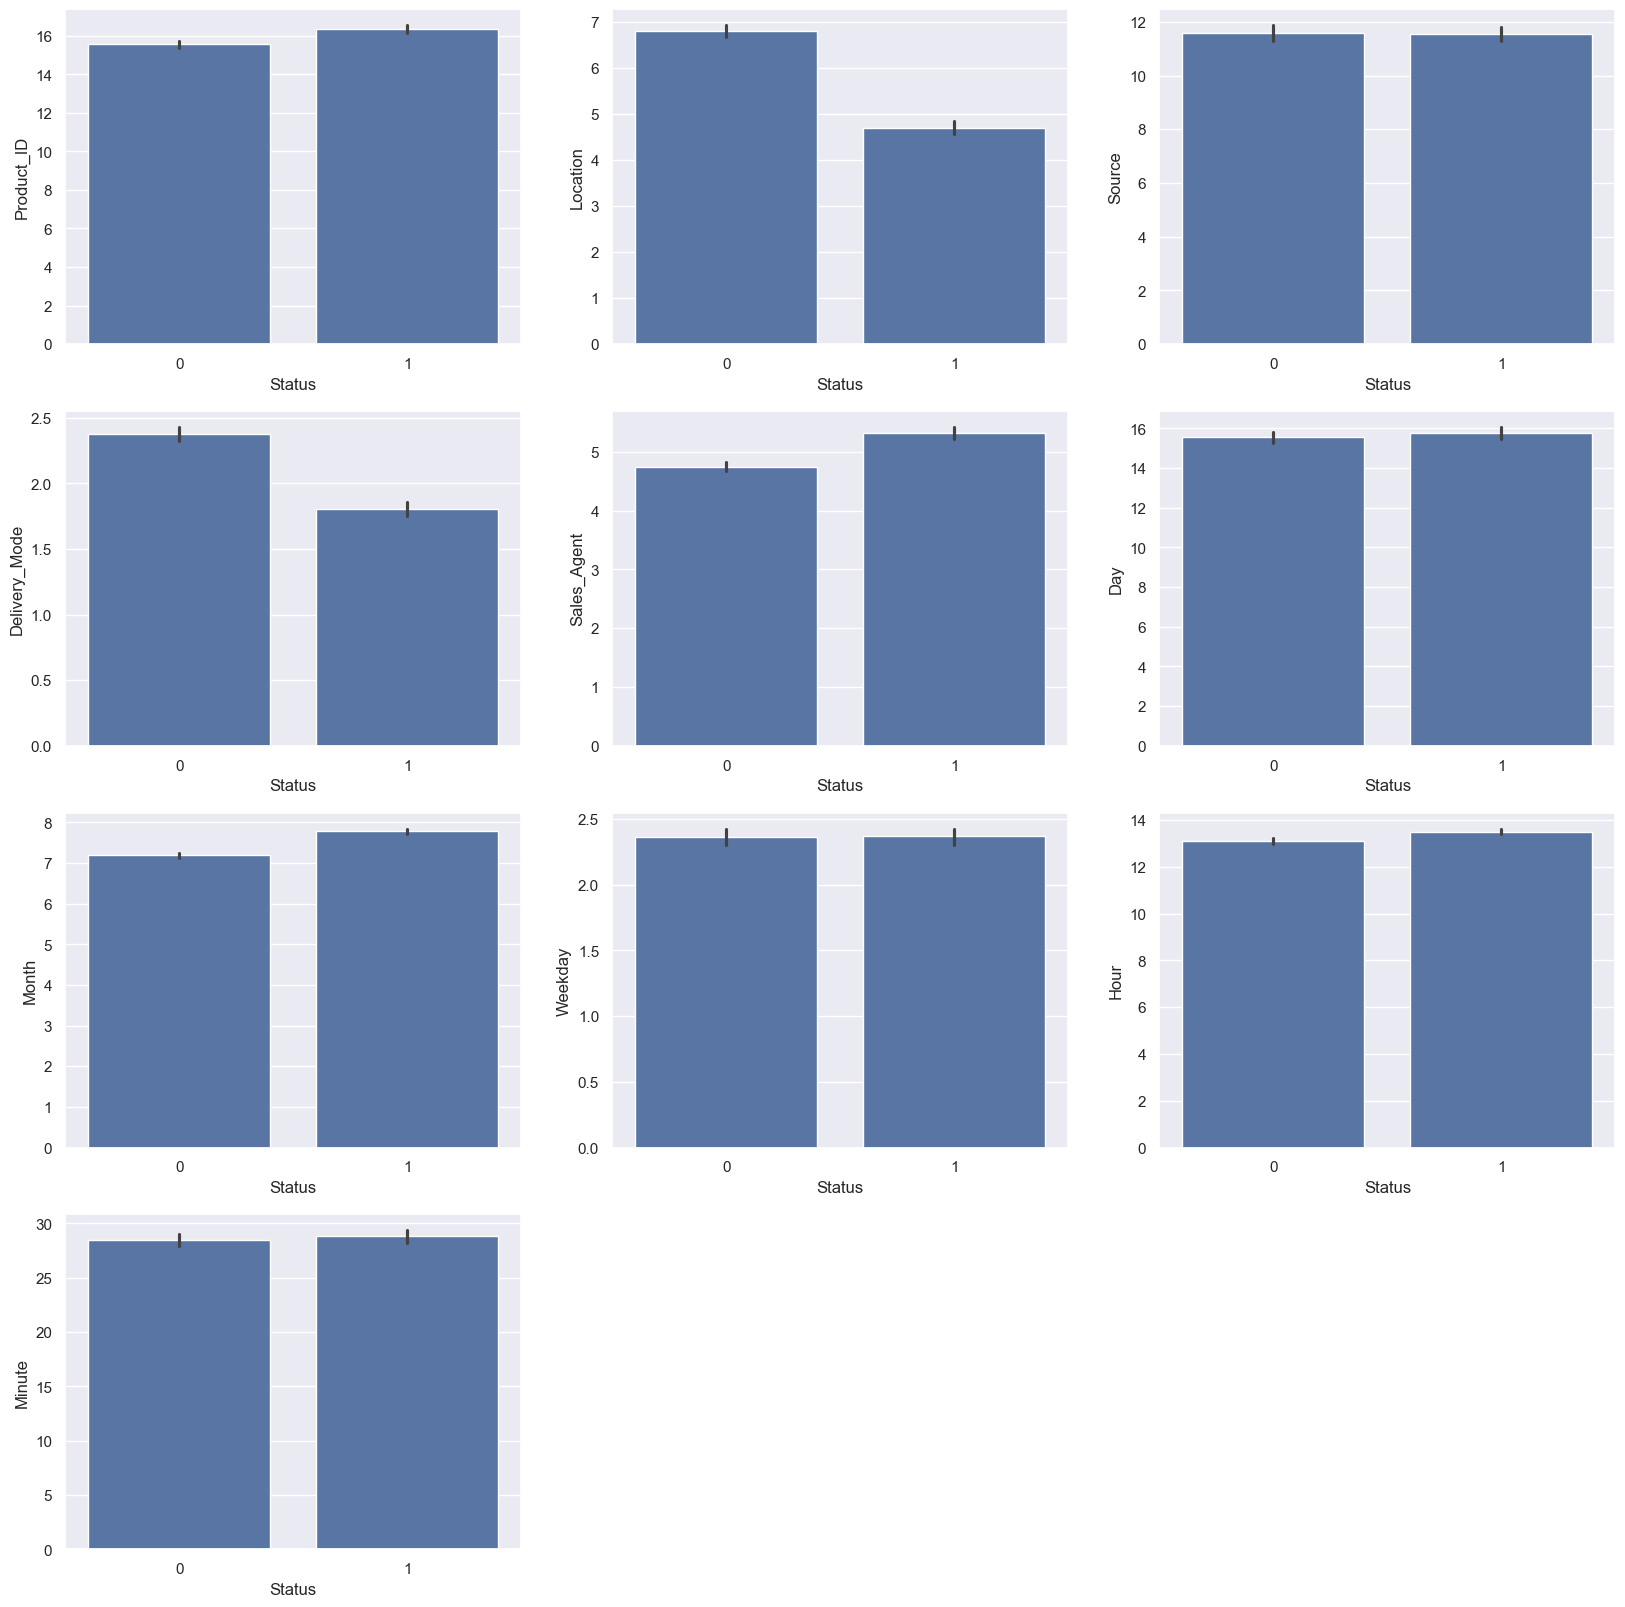

In [49]:
plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sb.barplot(x=data['Status'],y=data['Product_ID'])
plt.subplot(4,3,2)
sb.barplot(x=data['Status'],y=data['Location'])
plt.subplot(4,3,3)
sb.barplot(x=data['Status'],y=data['Source'])
plt.subplot(4,3,4)
sb.barplot(x=data['Status'],y=data['Delivery_Mode'])
plt.subplot(4,3,5)
sb.barplot(x=data['Status'],y=data['Sales_Agent'])
plt.subplot(4,3,6)
sb.barplot(x=data['Status'],y=data['Day'])
plt.subplot(4,3,7)
sb.barplot(x=data['Status'],y=data['Month'])
plt.subplot(4,3,8)
sb.barplot(x=data['Status'],y=data['Weekday'])
plt.subplot(4,3,9)
sb.barplot(x=data['Status'],y=data['Hour'])
plt.subplot(4,3,10)
sb.barplot(x=data['Status'],y=data['Minute'])

plt.show()

In [50]:
# 4) countplot

<Axes: >

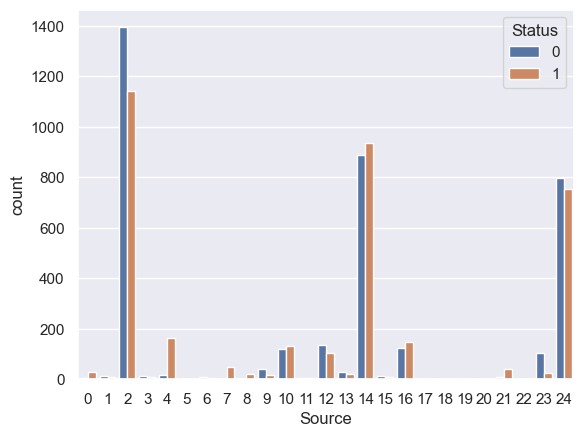

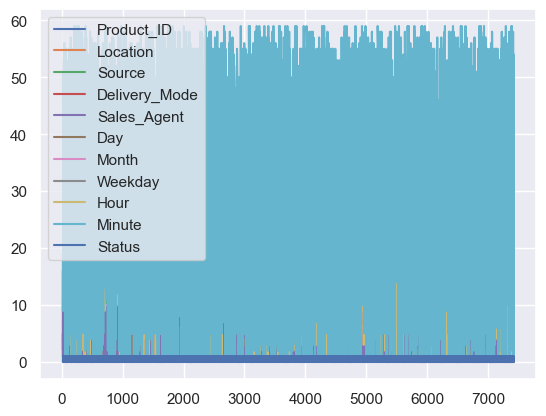

In [51]:
sb.countplot(x='Source',hue='Status',data=data)
data.plot()

In [52]:
#subplots-countplot

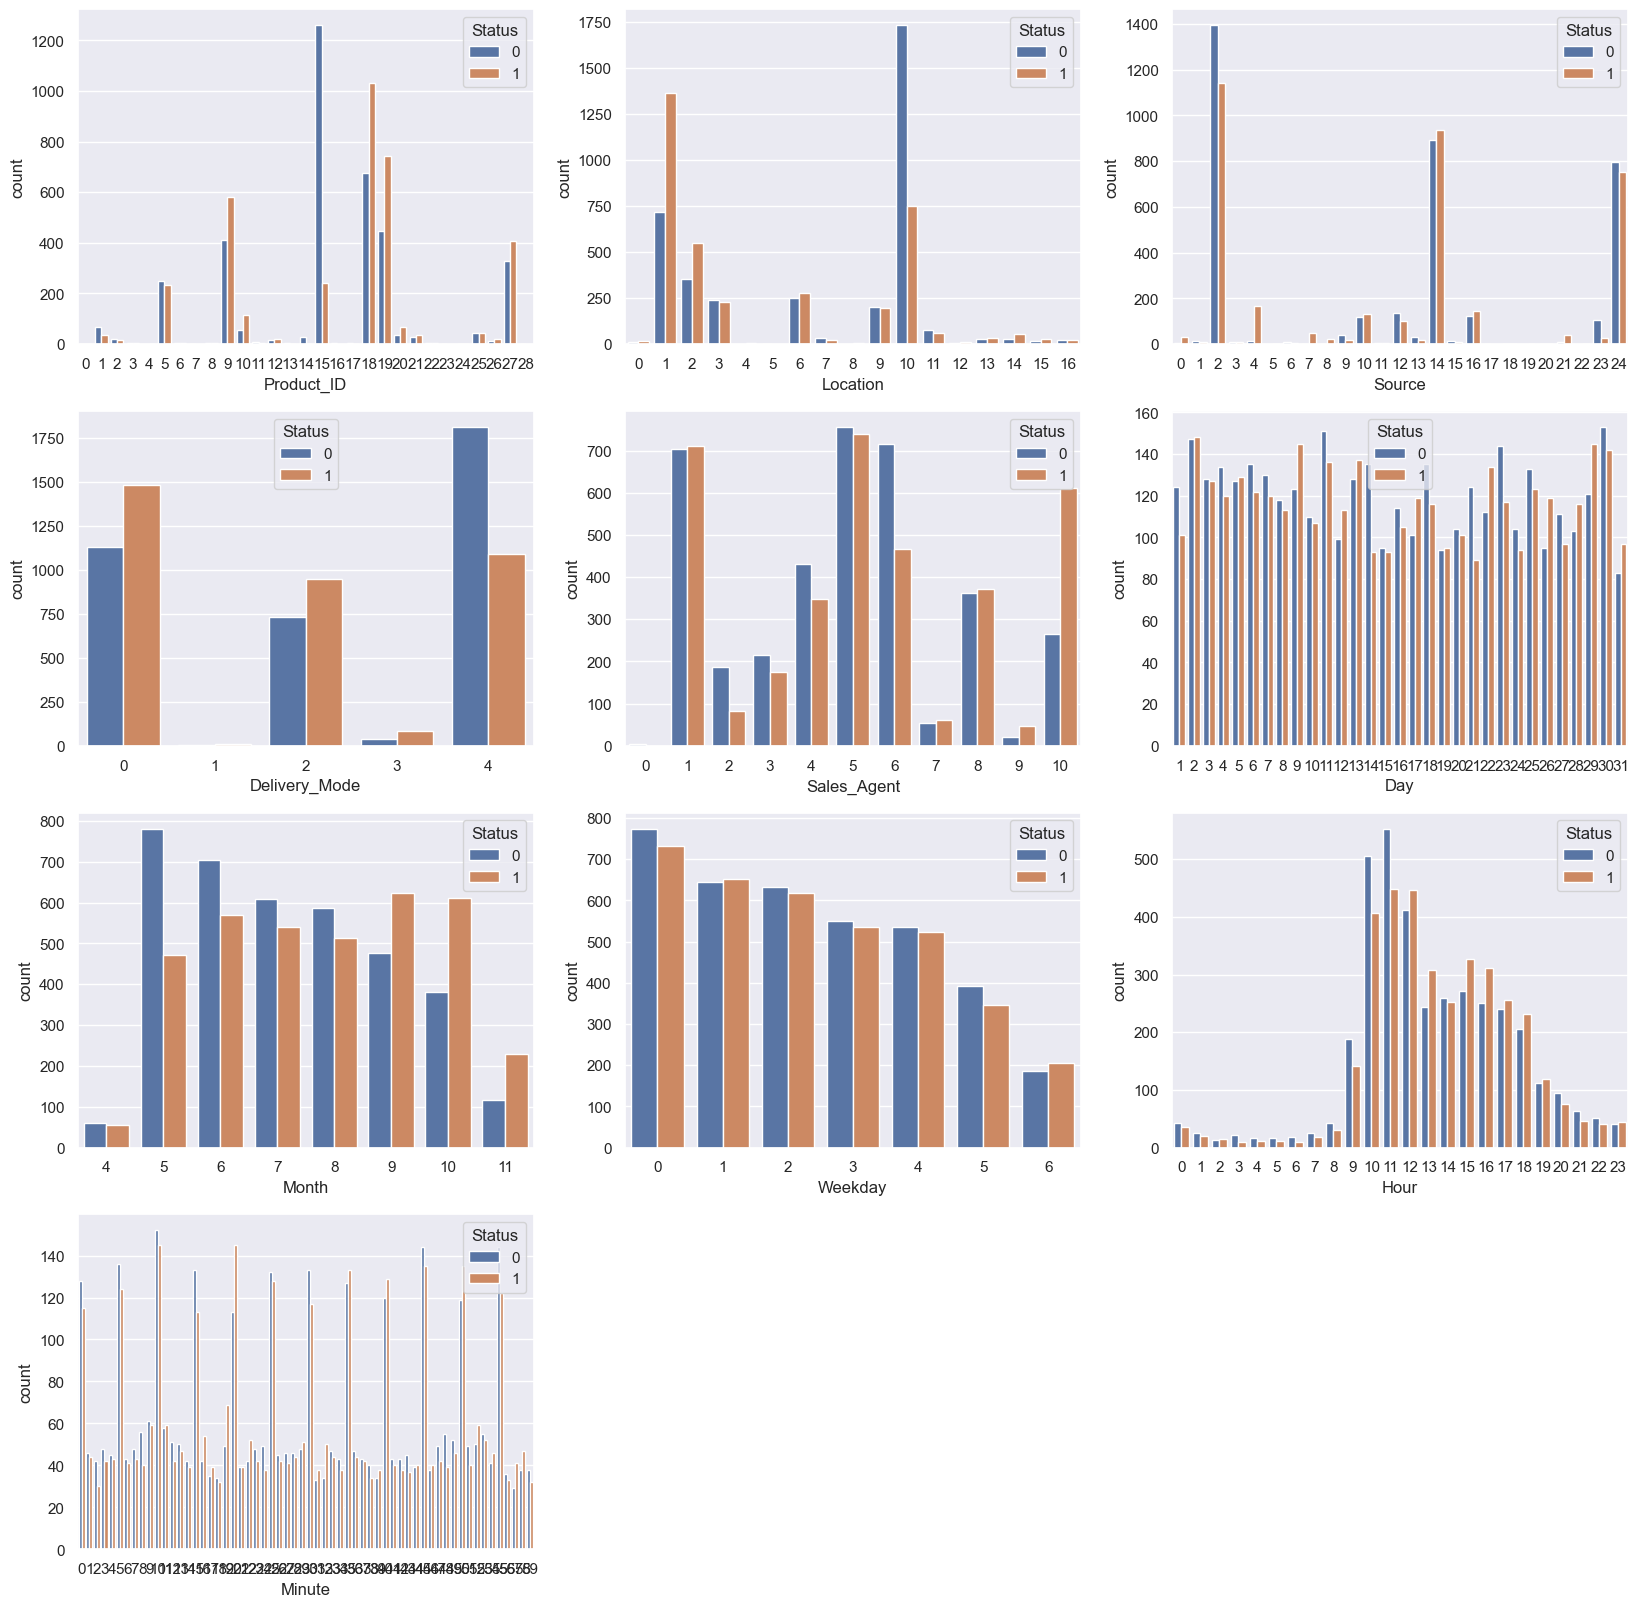

In [53]:
plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sb.countplot(x='Product_ID',hue='Status',data=data)
plt.subplot(4,3,2)
sb.countplot(x='Location',hue='Status',data=data)
plt.subplot(4,3,3)
sb.countplot(x='Source',hue='Status',data=data)
plt.subplot(4,3,4)
sb.countplot(x='Delivery_Mode',hue='Status',data=data)
plt.subplot(4,3,5)
sb.countplot(x='Sales_Agent',hue='Status',data=data)
plt.subplot(4,3,6)
sb.countplot(x='Day',hue='Status',data=data)
plt.subplot(4,3,7)
sb.countplot(x='Month',hue='Status',data=data)
plt.subplot(4,3,8)
sb.countplot(x='Weekday',hue='Status',data=data)
plt.subplot(4,3,9)
sb.countplot(x='Hour',hue='Status',data=data)
plt.subplot(4,3,10)
sb.countplot(x='Minute',hue='Status',data=data)

plt.show()

In [54]:
# 5) boxplot response with subplot

<Axes: ylabel='Source'>

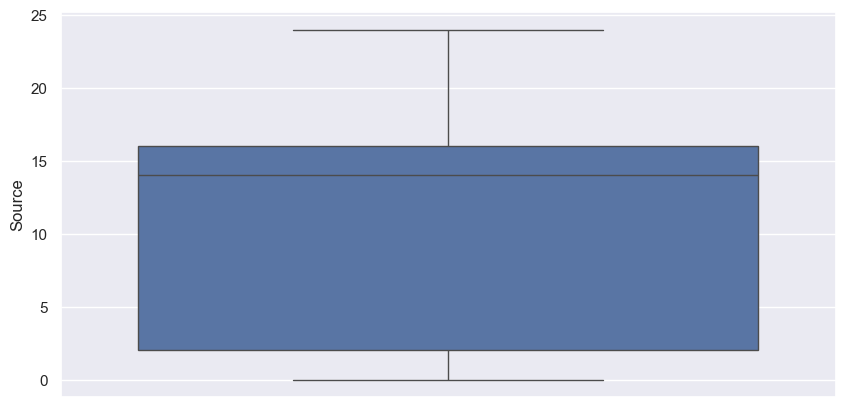

In [55]:
plt.figure(figsize=(10,5))
sb.boxplot(data['Source'])

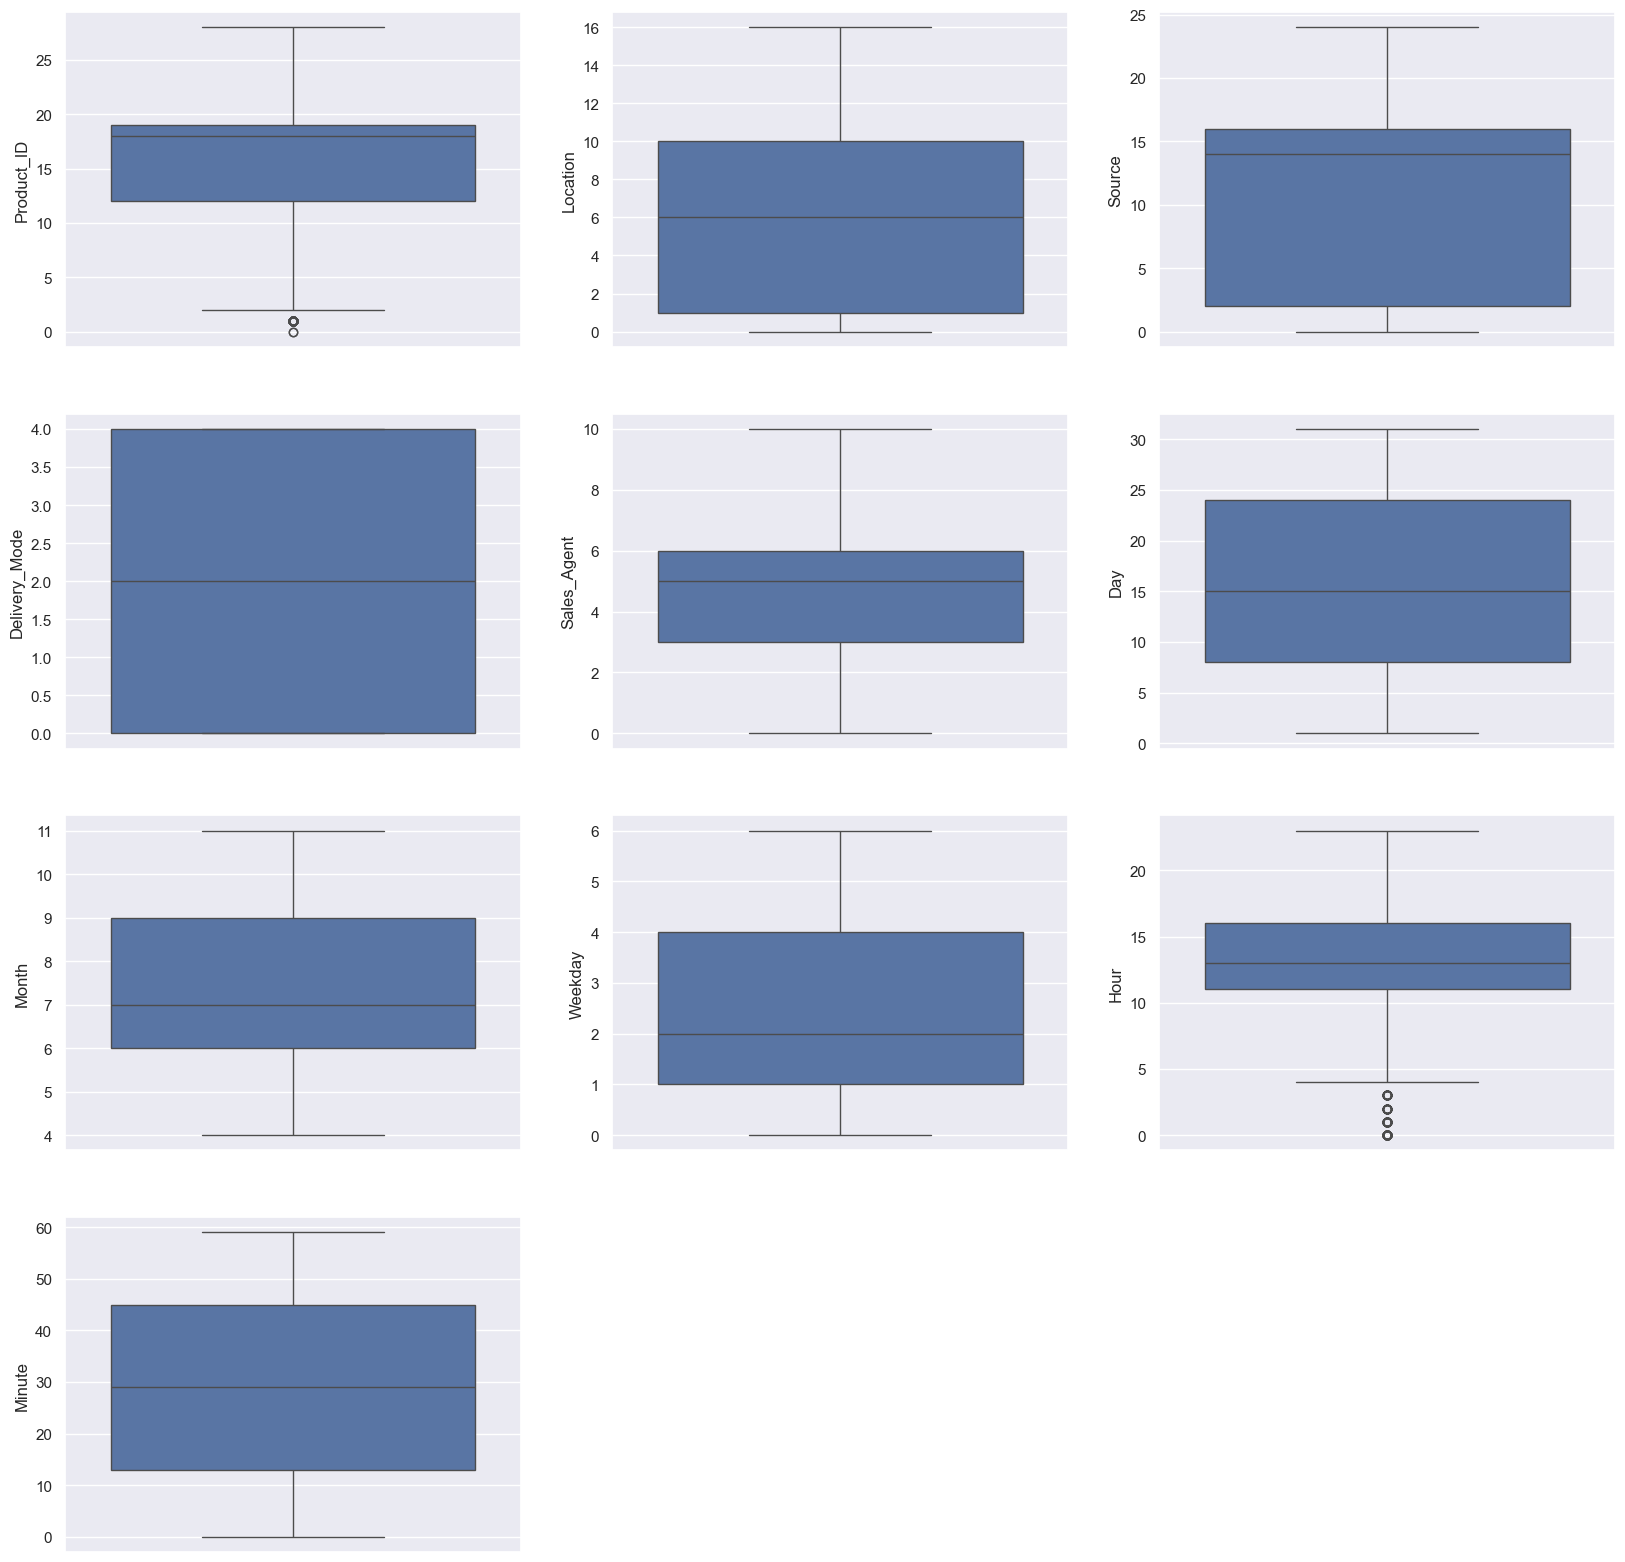

In [56]:
plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sb.boxplot(data['Product_ID'])
plt.subplot(4,3,2)
sb.boxplot(data['Location'])
plt.subplot(4,3,3)
sb.boxplot(data['Source'])
plt.subplot(4,3,4)
sb.boxplot(data['Delivery_Mode'])
plt.subplot(4,3,5)
sb.boxplot(data['Sales_Agent'])
plt.subplot(4,3,6)
sb.boxplot(data['Day'])
plt.subplot(4,3,7)
sb.boxplot(data['Month'])
plt.subplot(4,3,8)
sb.boxplot(data['Weekday'])
plt.subplot(4,3,9)
sb.boxplot(data['Hour'])
plt.subplot(4,3,10)
sb.boxplot(data['Minute'])

plt.show()

# Modelling

In [57]:
#Logistic Regression, KNN, Decision Tree,Random Forest, SVM,XGBoost,AdaBoosting,Naive bayes,NN-

# 1)Logistic Regression

In [58]:

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [59]:
data.head()

,Product_ID,Location,Source,Delivery_Mode,Sales_Agent,Day,Month,Weekday,Hour,Minute,Status
18,9,1,16,0,4,13,11,1,18,51,1
19,19,10,2,4,5,13,11,1,18,48,1
24,18,13,24,0,1,13,11,1,17,9,1
25,15,6,24,0,8,13,11,1,16,49,0
26,18,1,2,0,8,13,11,1,16,37,1


In [60]:
x=data.iloc[:,:-1]
y=data.Status

In [61]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

In [62]:
y.head()

18    1
19    1
24    1
25    0
26    1
Name: Status, dtype: int64

In [63]:
#we need check the performance accuracy,precision,recall,specificity  from confusion matrix

In [64]:
def performance(cm):
    a,b,c,d=cm.ravel()           #2 classifier....2x2=4
    accuracy=(a+d)/cm.sum()      
    precision=d/(d+b)            #PPV , 1-FDR                             fdr-false discovery r
    recall=d/(d+c)               #sensitivity, TPR , hit rate, 1-FNR      fnr-miss rate
    specificity=a/(a+b)          #selectivity, TNR ,1-FPR                 fpr-fall out
    F1_score=(2*precision*recall)/(precision+recall)       # HM of precision and recall
    print('Accuracy=',accuracy)
    print('Precision=',precision)
    print('Recall=',recall)
    print('Specificity=',specificity)
    print('F1-Score=',F1_score)

In [65]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=32)

In [66]:
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [67]:
y_pred=model.predict(x_test)
cm=confusion_matrix(y_test,y_pred)
performance(cm)

Accuracy= 0.6384720327421555
Precision= 0.6248236953455572
Recall= 0.6265912305516266
Specificity= 0.6495388669301713
F1-Score= 0.6257062146892656


# 2) KNN

In [68]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.preprocessing import scale

In [69]:
data.head()

,Product_ID,Location,Source,Delivery_Mode,Sales_Agent,Day,Month,Weekday,Hour,Minute,Status
18,9,1,16,0,4,13,11,1,18,51,1
19,19,10,2,4,5,13,11,1,18,48,1
24,18,13,24,0,1,13,11,1,17,9,1
25,15,6,24,0,8,13,11,1,16,49,0
26,18,1,2,0,8,13,11,1,16,37,1


In [70]:
x=data.iloc[:,[1,2,3,4]]
y=data.Status

In [71]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=32)

In [72]:
model=KNeighborsClassifier(n_neighbors=1,metric='euclidean')

In [73]:
model.fit(x_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=1)

In [74]:
y_pred=model.predict(x_test)

In [75]:
cm=confusion_matrix(y_test,y_pred)

In [76]:
performance(cm)

Accuracy= 0.6161891768985903
Precision= 0.5983606557377049
Recall= 0.619811320754717
Specificity= 0.6128182616330115
F1-Score= 0.6088971269694162


# 3)Decision Tree

In [77]:
from sklearn.tree import DecisionTreeClassifier,export_graphviz     #to visualize
from IPython.display import Image                                   #to show in image
import pydotplus                                                    #to visualize as well
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from io import StringIO

ModuleNotFoundError: No module named 'pydotplus'

In [ ]:
data.head(3)

In [ ]:
model=DecisionTreeClassifier( max_depth=4)
model.fit(x_train, y_train)

In [ ]:
# Visualize tree
node_data = StringIO()
export_graphviz(
    model,
    out_file=node_data,
    filled=True,
    rounded=True,
    feature_names=x_train.columns,  # dynamically match features
    class_names=['0', '1'],
    special_characters=True
)

graph = pydotplus.graph_from_dot_data(node_data.getvalue())


In [ ]:
#test

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=32)

In [ ]:
model.fit(x_train,y_train)

In [ ]:
y_pred=model.predict(x_test)

In [ ]:
cm=confusion_matrix(y_test,y_pred)

In [ ]:
performance(cm)

# 4) Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split#,GridSearchCV
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [ ]:
data.head(3)

In [ ]:
x=data.iloc[:,:-1]

In [ ]:
y=data.Status

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=32)

In [ ]:
model=RandomForestClassifier(n_estimators=40,random_state=42)

In [ ]:
model.fit(x_train,y_train)

In [ ]:
y_pred=model.predict(x_test)

In [ ]:
cm=confusion_matrix(y_test,y_pred)

In [ ]:
performance(cm)

# 5) SVM

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.preprocessing import scale

In [ ]:
x=scale(x)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=32)

In [ ]:
model=SVC(kernel='rbf',C=10, gamma=0.8)

In [ ]:
model.fit(x_train,y_train)

In [ ]:
y_pred=model.predict(x_test)
cm=confusion_matrix(y_test,y_pred)
performance(cm)

# 6) Neural Network

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=32)

In [ ]:
model=MLPClassifier(hidden_layer_sizes=(100,100,100),random_state=10,learning_rate_init=0.01,batch_size=50)

In [ ]:
model.fit(x_train,y_train)

In [ ]:
y_pred=model.predict(x_test)
cm=confusion_matrix(y_test,y_pred)
performance(cm)

# 7) XGBoost

In [ ]:
from xgboost import XGBClassifier

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import *

In [ ]:
model=XGBClassifier(learning_rate=0.1,random_state=32,n_estimators=200)

In [ ]:
model.fit(x_train,y_train)

In [ ]:
y_pred=model.predict(x_test)

In [ ]:
cm=confusion_matrix(y_test,y_pred)

In [ ]:
performance(cm)

## Hyperparameter Tunning

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Parameter grid for Gradient Boosting
param_grid = {
    'n_estimators': [100, 200, 300, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.6, 0.8, 1.0]
}

# Model
gb = GradientBoostingClassifier(random_state=42)

# Randomized Search
gb_search = RandomizedSearchCV(
    estimator=gb,
    param_distributions=param_grid,
    n_iter=20,
    cv=5,
    verbose=1,
    random_state=42,
    n_jobs=-1,
    scoring='accuracy'
)

# Fit on training data
gb_search.fit(x_train, y_train)

# Best parameters
print("Best Parameters:", gb_search.best_params_)

# Best model
best_gb = gb_search.best_estimator_

# Predictions
y_pred = best_gb.predict(x_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()

# Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
specificity = tn / (tn + fp)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy= {accuracy}")
print(f"Precision= {precision}")
print(f"Recall= {recall}")
print(f"Specificity= {specificity}")
print(f"F1-Score= {f1}")


## Conclusion
This project successfully achieved its objective by developing a machine learning model capable of automating lead quality categorization. The final Gradient Boosting model can predict whether a new lead is of high or low potential with approximately 70% accuracy. By implementing this solution, FicZon Inc. can replace its current manual and subjective lead sorting process with an efficient, data-driven system. This allows the sales team to focus their time and resources on engaging high-potential leads first. This strategic prioritization is expected to significantly enhance sales force effectiveness, improve conversion rates, and directly address the recent dip in sales. The model provides a robust foundation for smarter lead management and future sales growth.